In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/loan_sanction_train.csv')
test = pd.read_csv('/content/loan_sanction_test.csv')

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_org = train.copy()
test_org = test.copy()

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
train.shape, test.shape

((614, 13), (367, 12))

In [ ]:
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [ ]:
train['Loan_Status'].value_counts(normalize = True)

,proportion
Loan_Status,
Y,0.687296
N,0.312704


<Axes: xlabel='Loan_Status'>

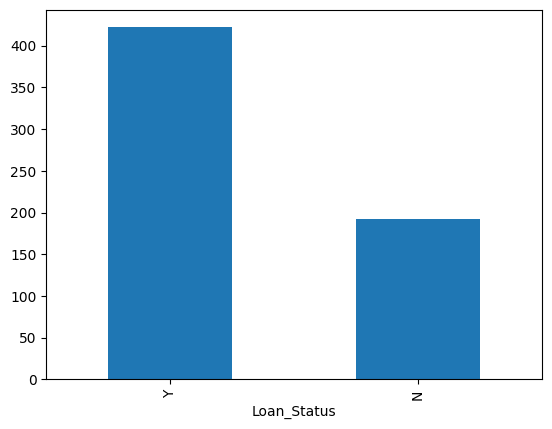

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

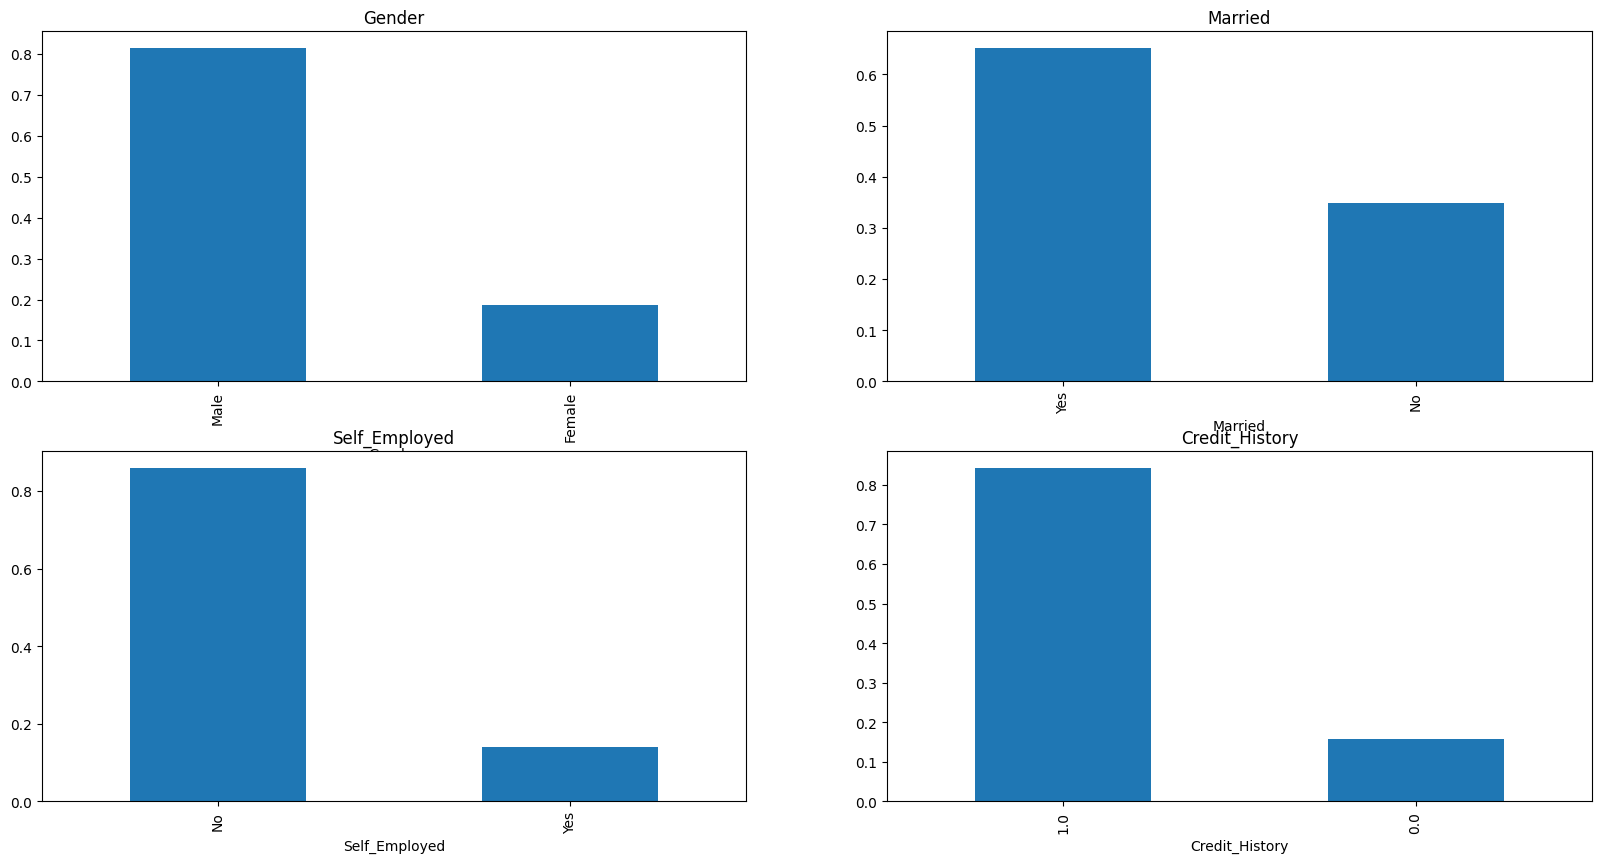

In [ ]:
plt.figure(1)

plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Credit_History')

plt.show()

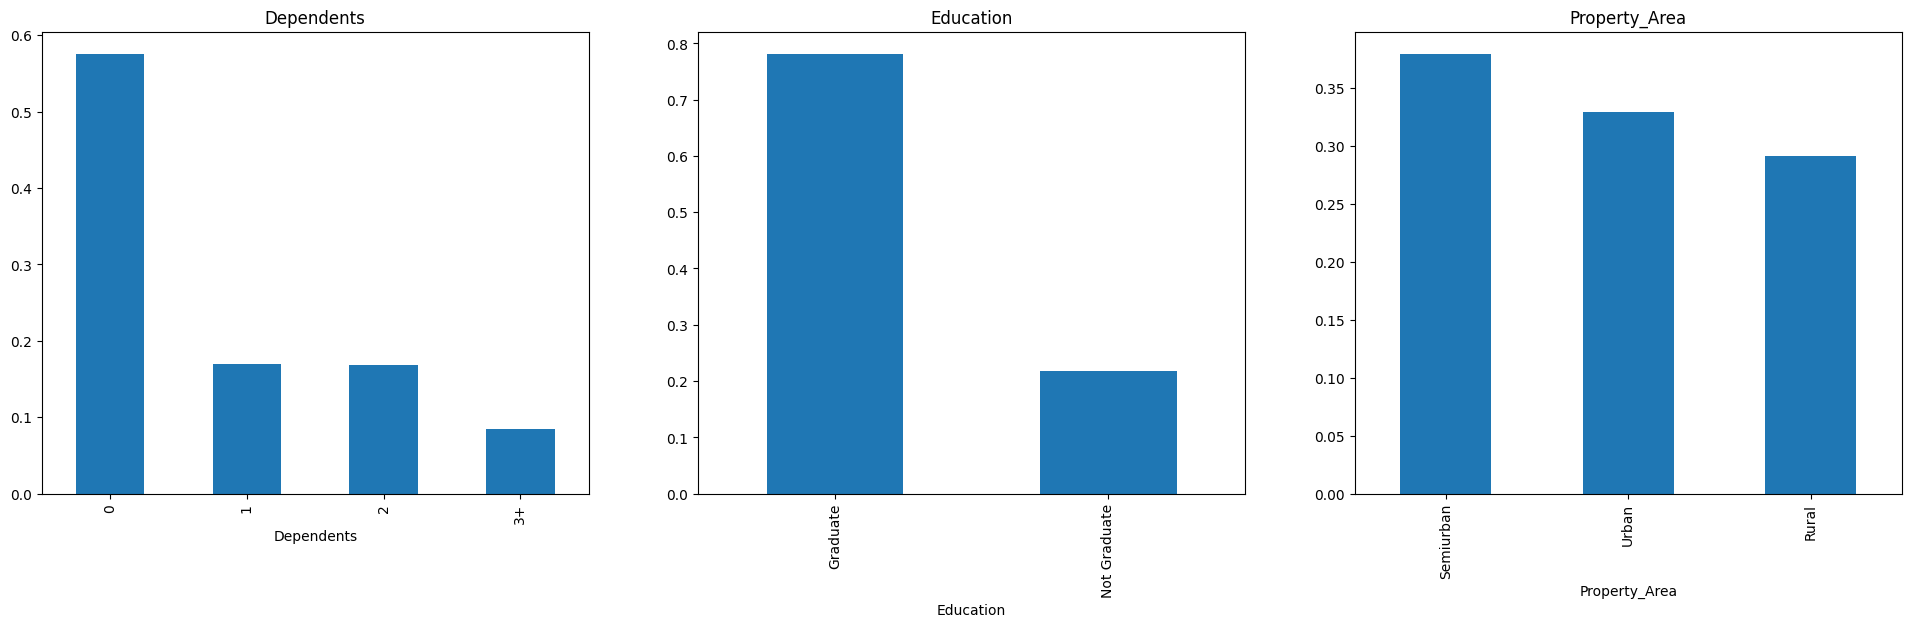

In [ ]:
plt.figure(1)

plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (24, 6), title = 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (24, 6), title = 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize = (24, 6), title = 'Property_Area')

plt.show()

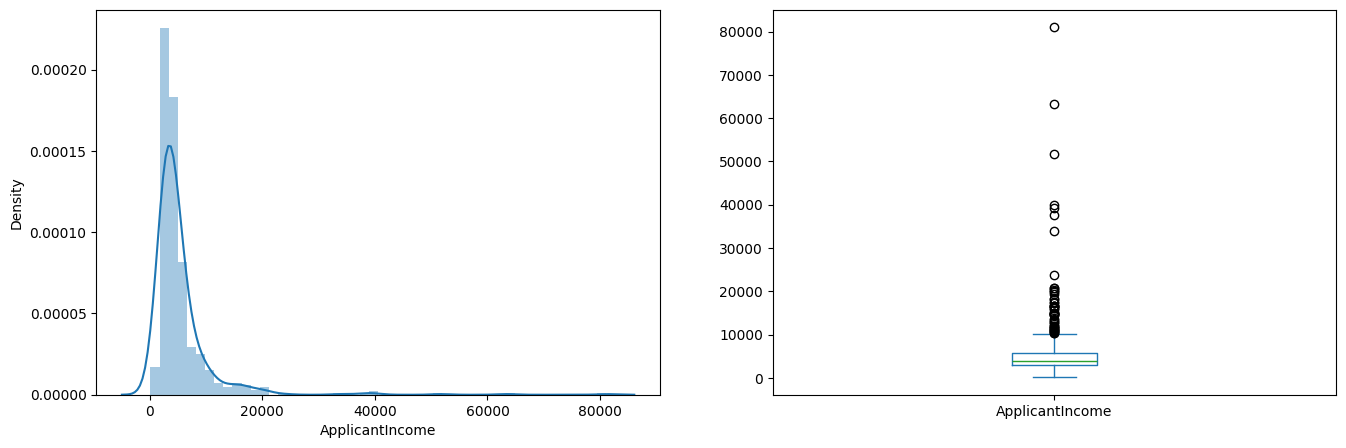

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (16, 5))
plt.show()

Text(0.5, 0.98, '')

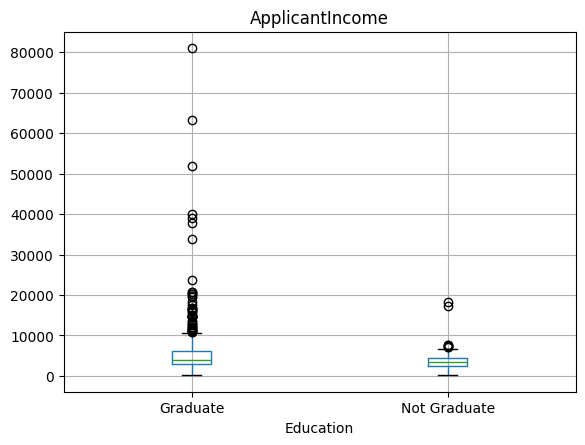

In [ ]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle('')

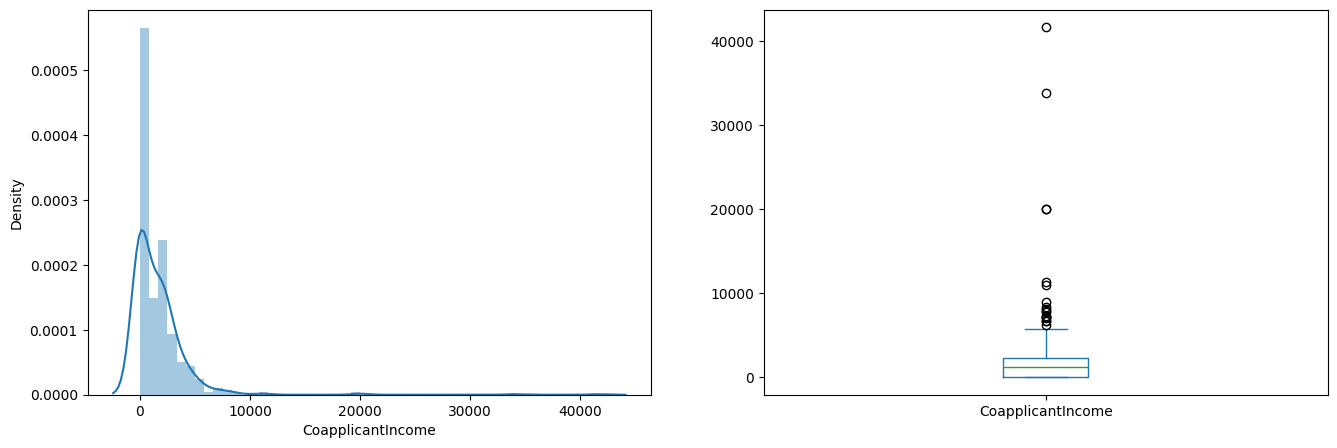

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize = (16, 5))
plt.show()

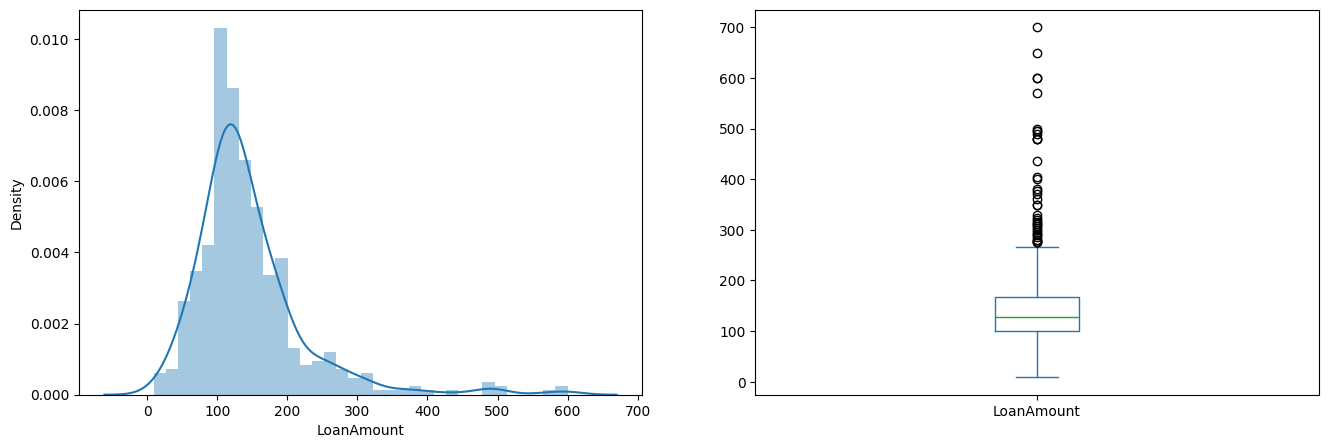

In [ ]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize = (16, 5))
plt.show()

<Axes: xlabel='Gender'>

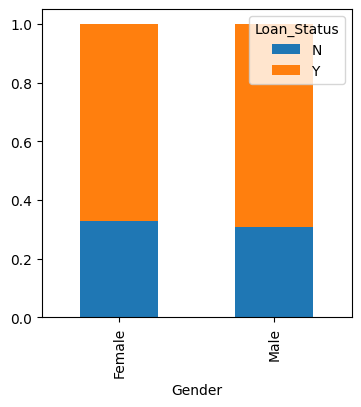

In [ ]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))

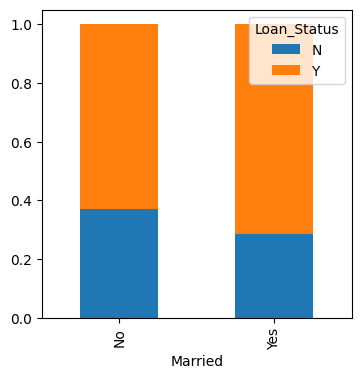

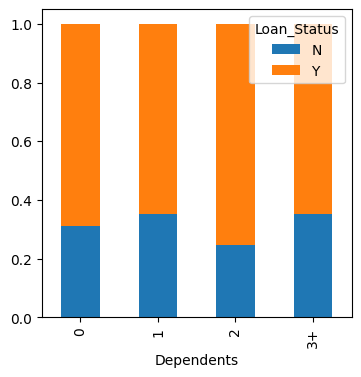

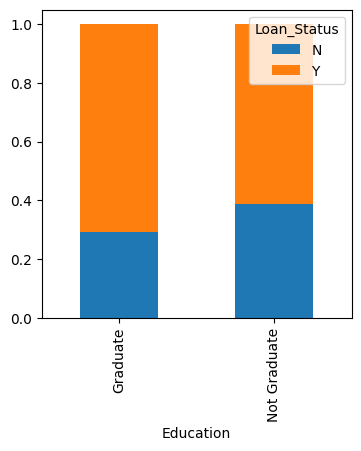

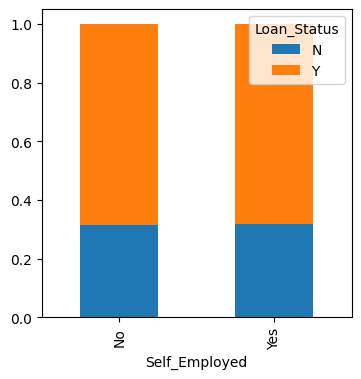

In [ ]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))
plt.show()

Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))
plt.show()

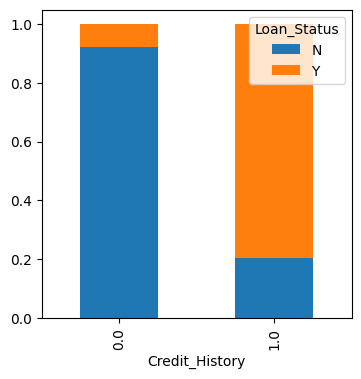

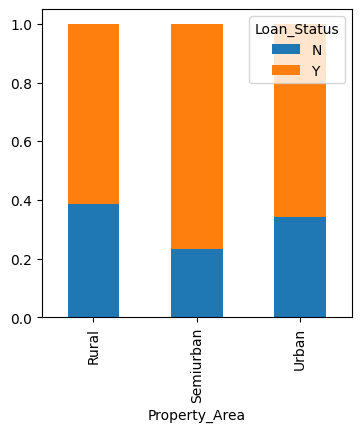

In [ ]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 4))
plt.show()

<Axes: xlabel='Loan_Status'>

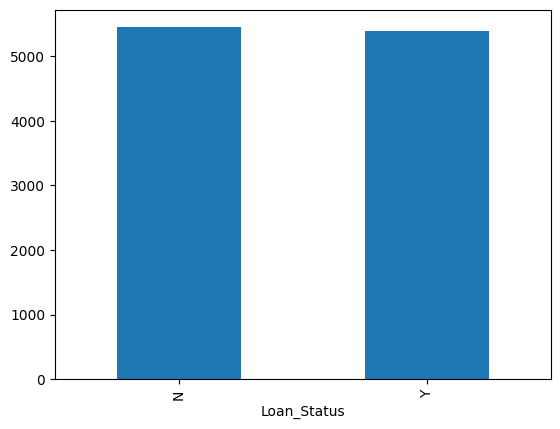

In [ ]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

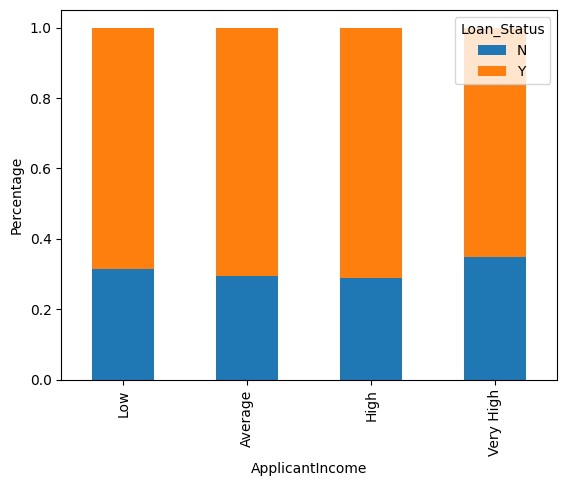

In [ ]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(df['ApplicantIncome'], bins, labels = group)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

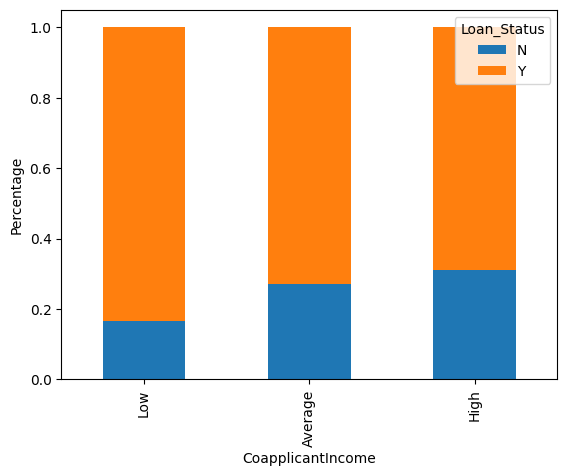

In [ ]:
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'], bins, labels = group)
Coapplicant_Income_bin =pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

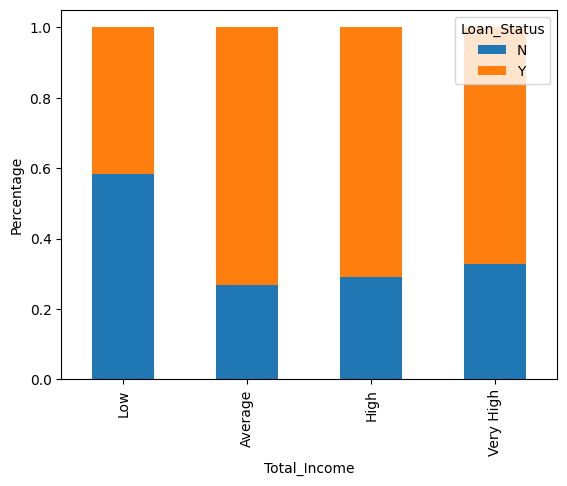

In [ ]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels = group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

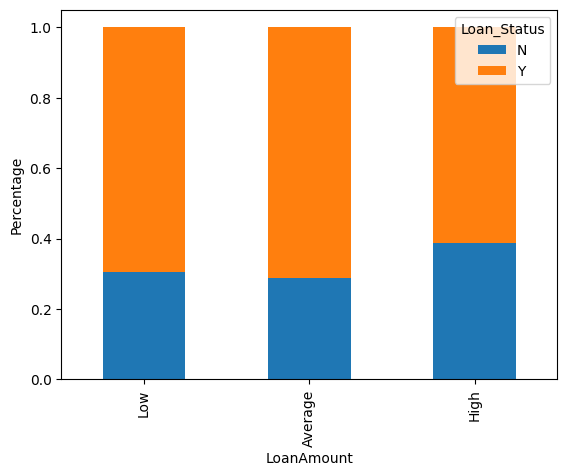

In [ ]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
train['LoanAmt_Bin'] = pd.cut(train['LoanAmount'], bins, labels = group)

LoanAmt_Bin = pd.crosstab(train['LoanAmt_Bin'], train['Loan_Status'])
LoanAmt_Bin.div(LoanAmt_Bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [ ]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'Total_Income', 'LoanAmt_Bin', 'Total_Income_bin'], axis = 1)
train['Dependents'].replace('3+', 3, inplace = True)
test['Dependents'].replace('3+', 3, inplace = True)
train['Loan_Status'].replace('N', 0, inplace = True)
train['Loan_Status'].replace('Y', 1, inplace = True)

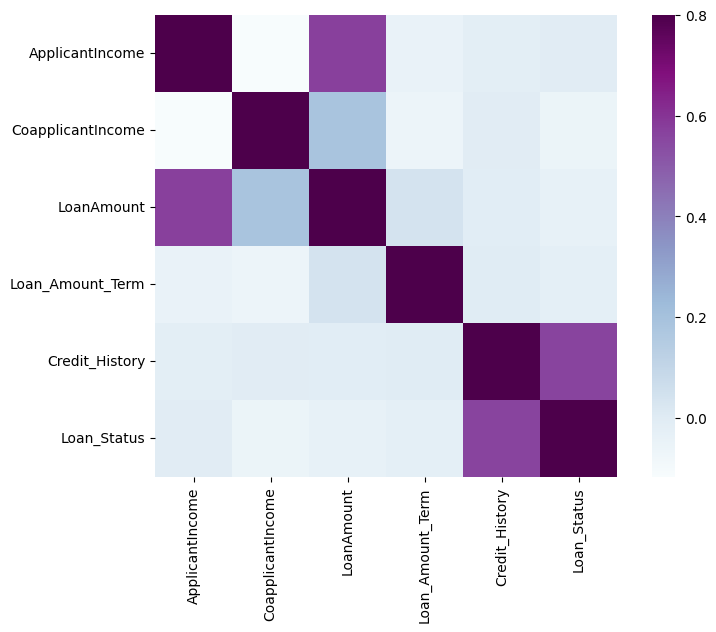

In [ ]:
matrix = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']].corr()
f, ax = plt.subplots(figsize = (9, 6))
sns.heatmap(matrix, vmax = .8, square = True, cmap = 'BuPu');

In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [ ]:
train['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Married'].fillna(test['Married'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)

In [ ]:
test.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: >

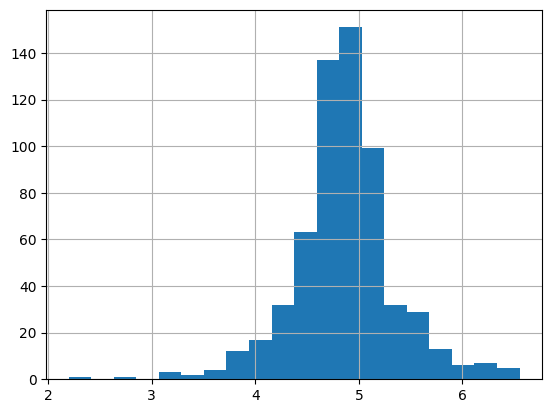

In [ ]:
train['LoanAmt_Log'] = np.log(train['LoanAmount'])
train['LoanAmt_Log'].hist(bins = 20)

In [ ]:
test['LoanAmt_Log'] = np.log(test['LoanAmount'])

In [ ]:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [ ]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']

In [ ]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred_cv = model.predict(X_cv)
accuracy_score(y_cv, pred_cv)

0.745945945945946

In [ ]:
pred_test = model.predict(test)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X, y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]
  model = LogisticRegression(random_state = 1)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)
  print('accuracy score', score)
  i += 1

pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:, 1]


1 of kfold 5
accuracy score 0.8048780487804879

2 of kfold 5
accuracy score 0.8373983739837398

3 of kfold 5
accuracy score 0.7723577235772358

4 of kfold 5
accuracy score 0.7804878048780488

5 of kfold 5
accuracy score 0.7950819672131147


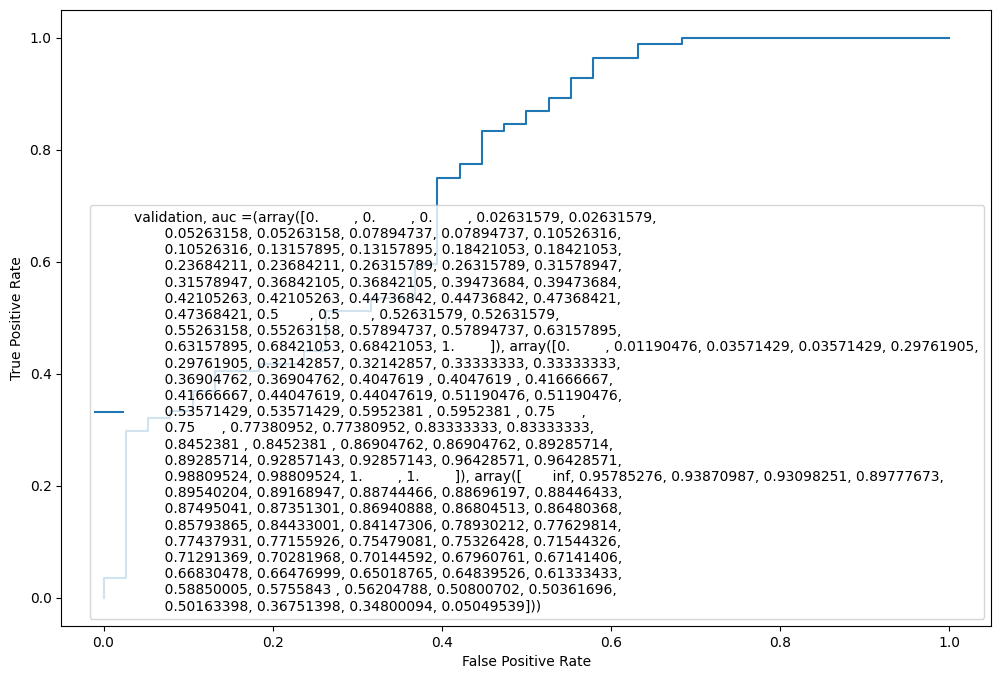

In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_curve(yvl, pred)

plt.figure(figsize = (12, 8))
plt.plot(fpr, tpr, label = 'validation, auc =' + str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4)
plt.show()

In [ ]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

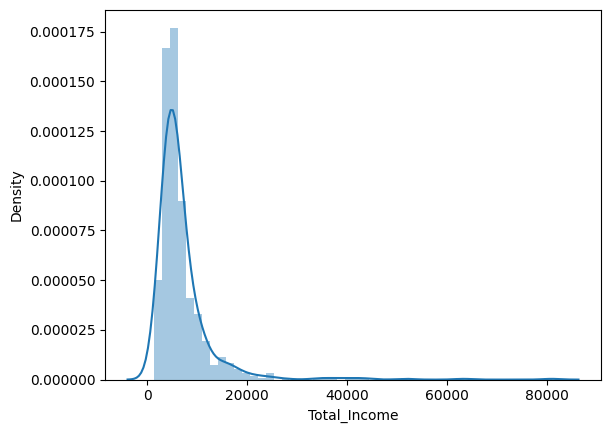

In [ ]:
sns.distplot(train['Total_Income']);

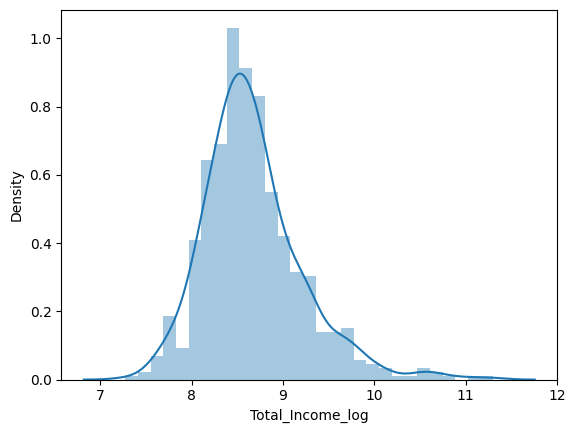

In [ ]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

In [ ]:
train['EMI'] = train['LoanAmount']/ train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/ test['Loan_Amount_Term']

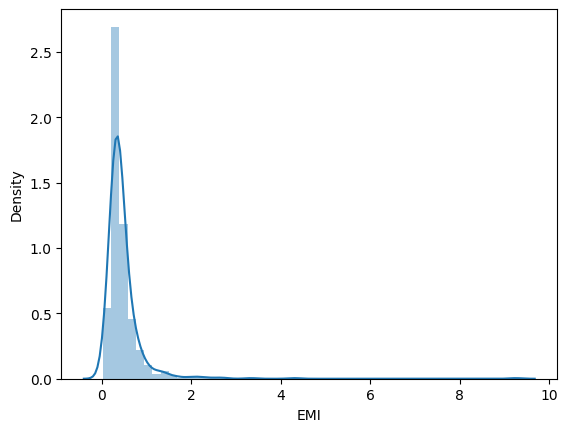

In [ ]:
sns.distplot(train['EMI']);

In [ ]:
train['Balance_Income'] = train['Total_Income'] - (train['EMI'] * 1000)
test['Balance_Income'] = test['Total_Income'] - (test['EMI'] * 1000)

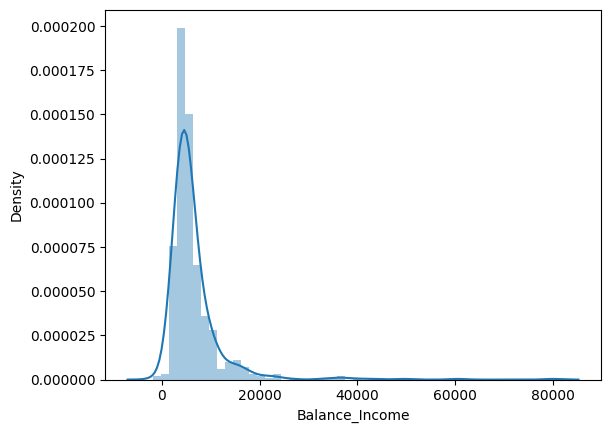

In [ ]:
sns.distplot(train['Balance_Income']);

In [ ]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

In [ ]:
X = train.drop('Loan_Status', axis = 1)
y = train.Loan_Status

In [ ]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X, y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]

  model = LogisticRegression(random_state = 1)
  model.fit(xtr, ytr)

  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)

  print('accuracy score', score)
  i += 1

pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:, 1]


1 of kfold 5
accuracy score 0.7886178861788617

2 of kfold 5
accuracy score 0.8373983739837398

3 of kfold 5
accuracy score 0.7967479674796748

4 of kfold 5
accuracy score 0.7886178861788617

5 of kfold 5
accuracy score 0.7950819672131147


In [ ]:
from sklearn import tree

i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X, y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]

  model = tree.DecisionTreeClassifier(random_state = 1)
  model.fit(xtr, ytr)

  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)

  print('accuracy score', score)
  i += 1

pred_test = model.predict(test)


1 of kfold 5
accuracy score 0.7398373983739838

2 of kfold 5
accuracy score 0.6991869918699187

3 of kfold 5
accuracy score 0.7560975609756098

4 of kfold 5
accuracy score 0.7073170731707317

5 of kfold 5
accuracy score 0.6721311475409836


In [ ]:
from sklearn.ensemble import RandomForestClassifier

i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X, y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]

  model = RandomForestClassifier(random_state = 1)
  model.fit(xtr, ytr)

  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)

  print('accuracy score', score)
  i += 1

pred_test = model.predict(test)


1 of kfold 5
accuracy score 0.8292682926829268

2 of kfold 5
accuracy score 0.7886178861788617

3 of kfold 5
accuracy score 0.8048780487804879

4 of kfold 5
accuracy score 0.8048780487804879

5 of kfold 5
accuracy score 0.7540983606557377


In [ ]:
from sklearn.model_selection import GridSearchCV

paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), paramgrid)

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 1)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [ ]:
i = 1

kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X, y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]

  model = RandomForestClassifier(random_state = 1, max_depth = 3, n_estimators = 41)
  model.fit(xtr, ytr)

  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)

  print('accuracy score', score)
  i += 1

pred_test = model.predict(test)
pred2 = model.predict_proba(test)[:,1]


1 of kfold 5
accuracy score 0.8130081300813008

2 of kfold 5
accuracy score 0.8455284552845529

3 of kfold 5
accuracy score 0.8048780487804879

4 of kfold 5
accuracy score 0.7967479674796748

5 of kfold 5
accuracy score 0.7786885245901639


In [ ]:
from xgboost import XGBClassifier

i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(X, y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]

  model = XGBClassifier(max_depth = 4, n_estimators = 50)
  model.fit(xtr, ytr)

  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)

  print('accuracy score', score)
  i += 1

pred_test = model.predict(test)
pred2 = model.predict_proba(test)[:,1]


1 of kfold 5
accuracy score 0.7723577235772358

2 of kfold 5
accuracy score 0.7886178861788617

3 of kfold 5
accuracy score 0.7723577235772358

4 of kfold 5
accuracy score 0.7804878048780488

5 of kfold 5
accuracy score 0.7704918032786885
